# Using Python for understanding a function of two variables.

### Part 1: Visualisation
We'll start by defining our function in Python and making some initial plots to help see how the function is varying with $x$ and $y$.

We use `matplotlib` to make both a surface plot and a contour plot of $f(x,y)$.

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x, y = sym.symbols("x,y" , real= True)

f = (x**3 + y**3 + x*y) * sym.exp(-x**2-y**2)
f

(x**3 + x*y + y**3)*exp(-x**2 - y**2)

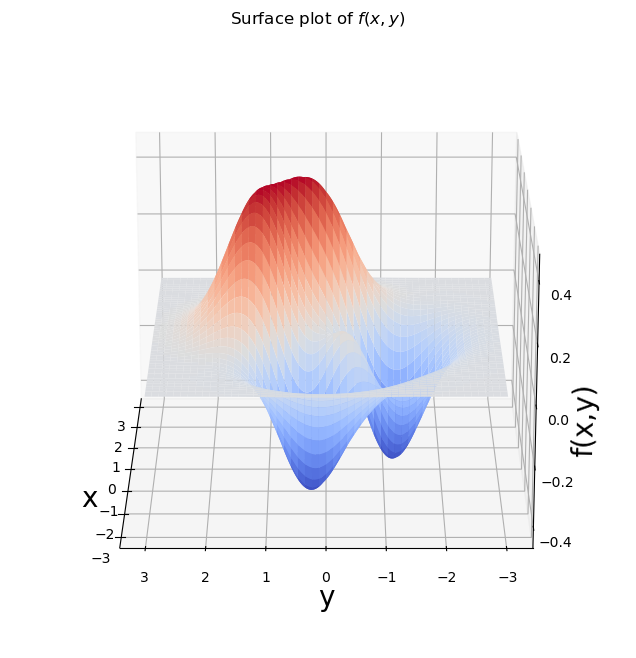

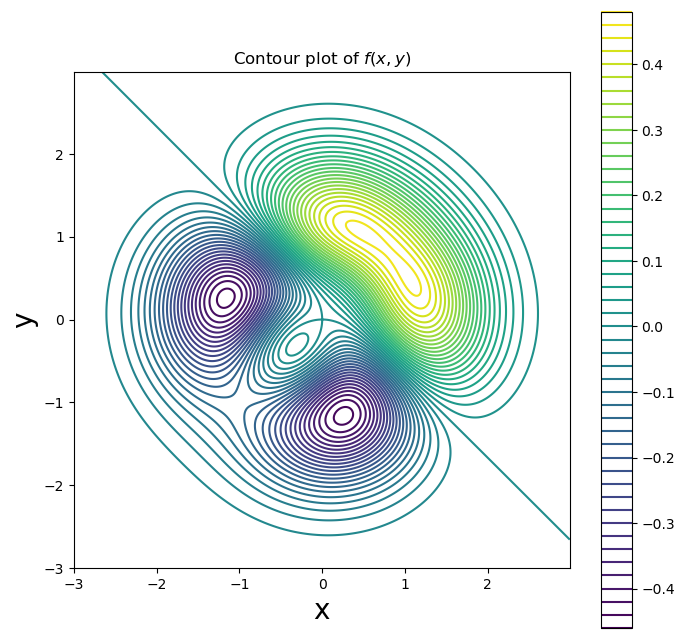

In [2]:
lambdifiedfunction = sym.lambdify([x,y], f , "numpy")

xp = np.arange(-3, 3, 0.01)
yp = np.arange(-3, 3, 0.01)

X, Y = np.meshgrid(xp, yp)
Z = lambdifiedfunction(X,Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

ax.plot_surface(X, Y, Z, cmap="coolwarm");
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('f(x,y)',fontsize=20);
ax.view_init(20,180)
ax.set_title("Surface plot of $f(x,y)$");



fig, ax = plt.subplots(figsize=(8,8))

ax.set_aspect(1)


C = ax.contour(X, Y, Z, levels = 50)
fig.colorbar(C)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title("Contour plot of $f(x,y)$");

### Part 2: Locating and classificating of stationary points (algebraic)
We *Sympy* to find the two first partial derivatives of $f$, $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$, and store these in variables called `fx` and `fy`.

Stationary points are locations where the following system of equations is satisfied:

$$\frac{\partial f}{\partial x}=0, \ \  \frac{\partial f}{\partial y}=0.$$ 
  

We then use the `nonlinsolve` command to try and solve the system of equations $\{f_x=0, f_y=0\}$, storing any solutions obtained in a list called `SOLS1`.

In [3]:
fx = sym.diff(f,x)
fy = sym.diff(f,y)

In [4]:
# sym.nonlinsolve([fx,fy],[x,y])

eqs = [fx.factor(),fy.factor()]

SOLS1 = list(sym.nonlinsolve(eqs , [x, y]))
SOLS1 = SOLS1[0:4]
SOLS1

[(-1, -1),
 (0, 0),
 (1/4 - sqrt(5)/4, 1/4 - sqrt(5)/4),
 (1/4 + sqrt(5)/4, 1/4 + sqrt(5)/4)]

Now we take those stationary points identified above and use algebraic techniques to determine the nature of each point.
We first calculate the partial derivatives and then the discriminant. Finally, we classify the nature of each stationary point.

In [5]:
fxy = sym.diff(fx,y)
fyx = sym.diff(fy,x)
fxy == fyx

True

In [6]:
fxx = sym.diff(fx,x)
fyy = sym.diff(fy,y)

Delta = fxx * fyy - fxy ** 2

In [7]:
SOLS1_TYPES = []
for i in range(0,len(SOLS1)):
    temp_list = []
    if Delta.subs([(x,SOLS1[i][0]), (y,SOLS1[i][1])]) < 0:
        temp_list.append(SOLS1[i][0])
        temp_list.append(SOLS1[i][1])
        temp_list.append("saddle")
    elif Delta.subs([(x,SOLS1[i][0]), (y,SOLS1[i][1])]) > 0:
        if fxx.subs([(x,SOLS1[i][0]), (y,SOLS1[i][1])]) < 0:
            temp_list.append(SOLS1[i][0])
            temp_list.append(SOLS1[i][1])
            temp_list.append("maximum")
        elif fxx.subs([(x,SOLS1[i][0]), (y,SOLS1[i][1])]) > 0:
            temp_list.append(SOLS1[i][0])
            temp_list.append(SOLS1[i][1])
            temp_list.append("minimum")
    elif Delta.subs([(x,SOLS1[i][0]), (y,SOLS1[i][1])]) == 0:
        print("test is inconclusive")    
    
    SOLS1_TYPES.append(temp_list)

SOLS1_TYPES
    

[[-1, -1, 'saddle'],
 [0, 0, 'saddle'],
 [1/4 - sqrt(5)/4, 1/4 - sqrt(5)/4, 'maximum'],
 [1/4 + sqrt(5)/4, 1/4 + sqrt(5)/4, 'saddle']]

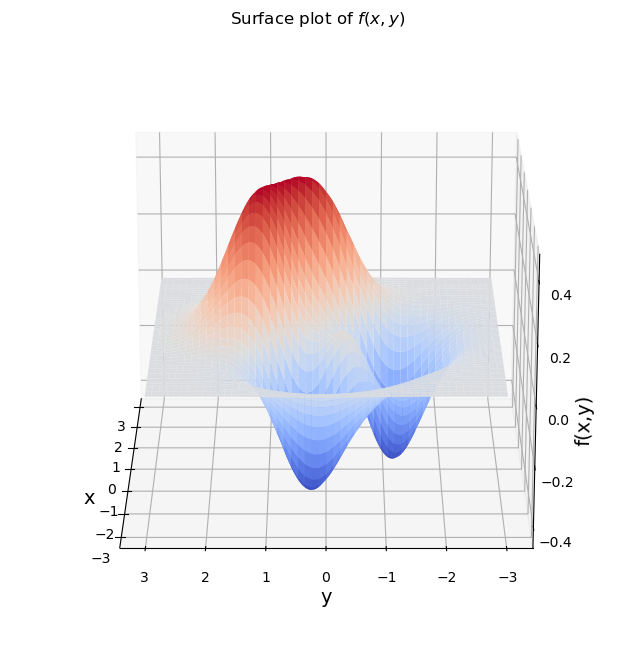

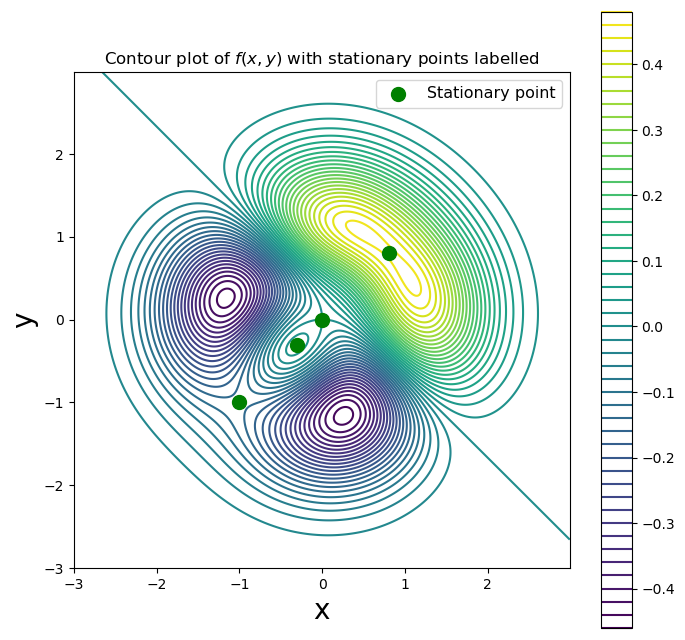

In [8]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lambdifiedfunction = sym.lambdify([x,y], f , "numpy")
stat_x = [-1,0,1/4 - 5 **(0.5) / 4,1/4 + 5 **(0.5) / 4]
stat_y = [-1,0,1/4 - 5 **(0.5) / 4,1/4 + 5 **(0.5) / 4]

xp = np.arange(-3, 3, 0.01)
yp = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(xp, yp)
Z = lambdifiedfunction(X,Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

ax.plot_surface(X, Y, Z, cmap="coolwarm");
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('f(x,y)',fontsize=14);
ax.view_init(20,180)
ax.set_title("Surface plot of $f(x,y)$");


fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)

C = ax.contour(X, Y, Z, levels = 50)
fig.colorbar(C)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.scatter(stat_x, stat_y, marker="o", color="g", s=100, zorder=2, label="Stationary point")
ax.legend(loc='upper right',  prop={'size': 11.5})
ax.set_title(f"Contour plot of $f(x,y)$ with stationary points labelled");


By looking at the surface plot we can see that there are at least four more critical points: the two blue negative peaks and the red peaks.

### Part 2: Locating and classificating of stationary points (numeric)

The symbolic solver hasn't returned all stationary points of $f(x,y)$.  

For any stationary point that has not been found already, we locate the stationary point and classify the nature of the stationary point using a different method.

We will now plot $f_x = 0$ and $f_y = 0$ in red and blue respectively. A point is a stationary point if the equations have a solution in common. Graphically, this can be seen by checking when the lines red and blue lines interesect with each other. 

Text(0, 0.5, 'y')

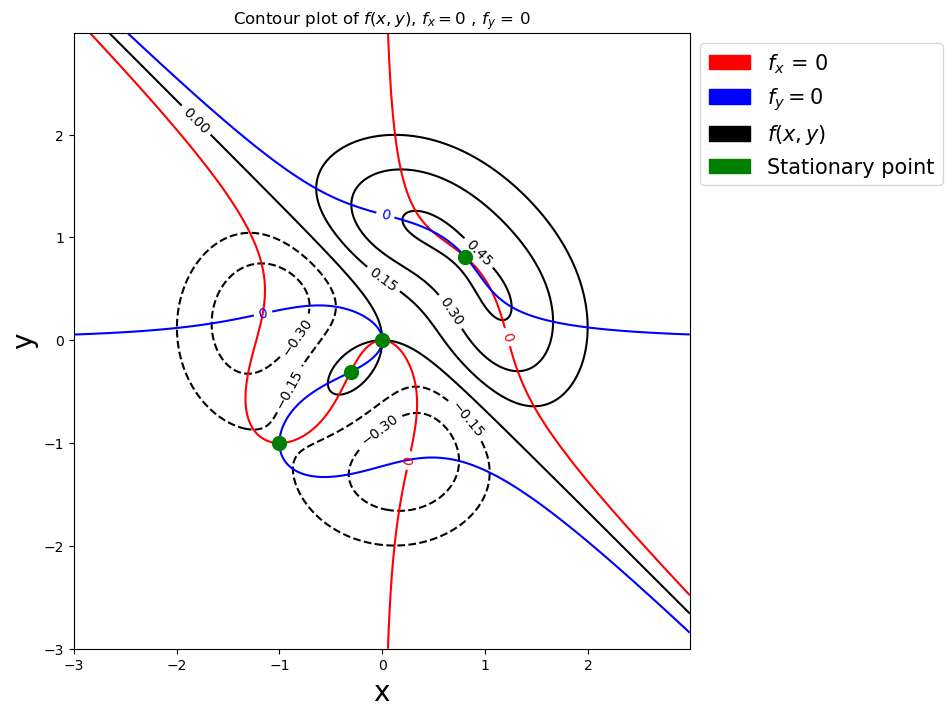

In [9]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


xp = np.arange(-3,3, 0.01)
yp = np.arange(-3,3, 0.01)
X, Y = np.meshgrid(xp, yp)
lam_f = sym.lambdify([x,y], f , "numpy")(X,Y)
lam_fx = sym.lambdify([x,y], fx , "numpy")(X,Y)
lam_fy = sym.lambdify([x,y], fy , "numpy")(X,Y)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)

graph_f = ax.contour(X, Y, lam_f, levels = 8, colors = "k")
graph_fx = ax.contour(X, Y, lam_fx, levels = [0], colors = "r")
graph_fy = ax.contour(X, Y, lam_fy, levels = [0], colors = "b")
ax.scatter(stat_x, stat_y, marker="o", color="g", s=100, zorder=2, label="Stationary point")
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='r',label='$f_x$ = 0')
blue_patch = mpatches.Patch(color='b',label='$f_y = 0$')
black_patch = mpatches.Patch(color='k',label='$f(x,y)$')
green_patch = mpatches.Patch(color='g',label='Stationary point')
ax.legend(handles = [red_patch,blue_patch,black_patch,green_patch], loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 15})
ax.set_title(f"Contour plot of $f(x,y)$, $f_x = 0$ , $f_y$ = 0");


ax.clabel(graph_f)
ax.clabel(graph_fx)
ax.clabel(graph_fy)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)

We can see from the plot above that there are 8 intersections so there are 8 stationary points. We already know what 4 of these points are: $(-1, -1), (0, 0), (\frac{1}{4} - \frac{\sqrt5}{4}, \frac{1}{4} - \frac{\sqrt5}{4}), (\frac{1}{4} + \frac{\sqrt5}{4}, \frac{1}{4} + \frac{\sqrt5}{4}) $. From the countour plot we can see that the other points are such that:
* $x \in (-2,-1)$ and $y \in (-0.5,0.5)$ 
* $x \in (-0.5,0.5)$ and $y \in (-1.5,-0.5)$
* $x \in (0,1.5)$ and $y \in (0,1.5)$ 

We will try to focus on these points by zooming in the contour plot

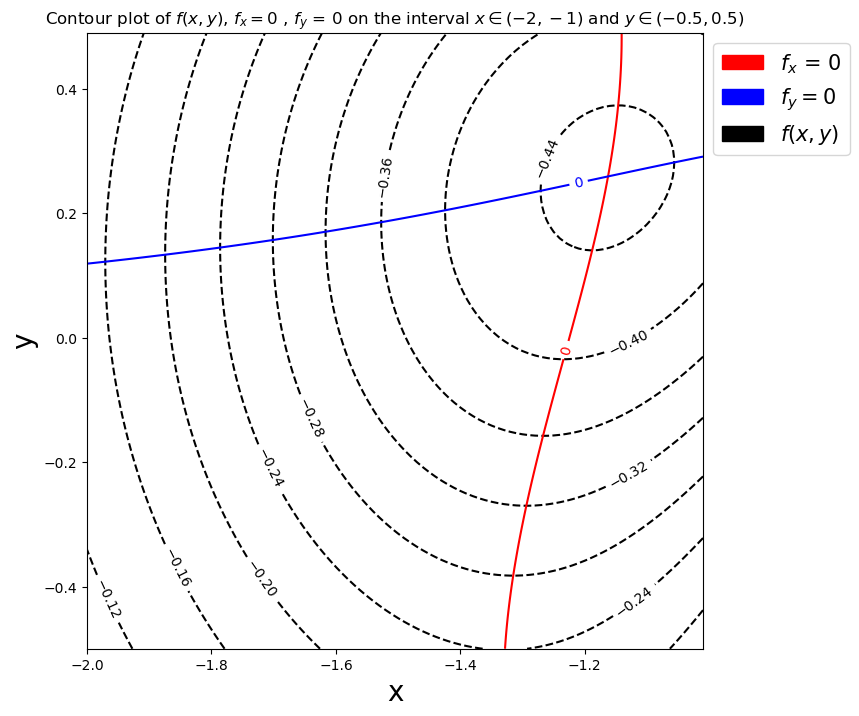

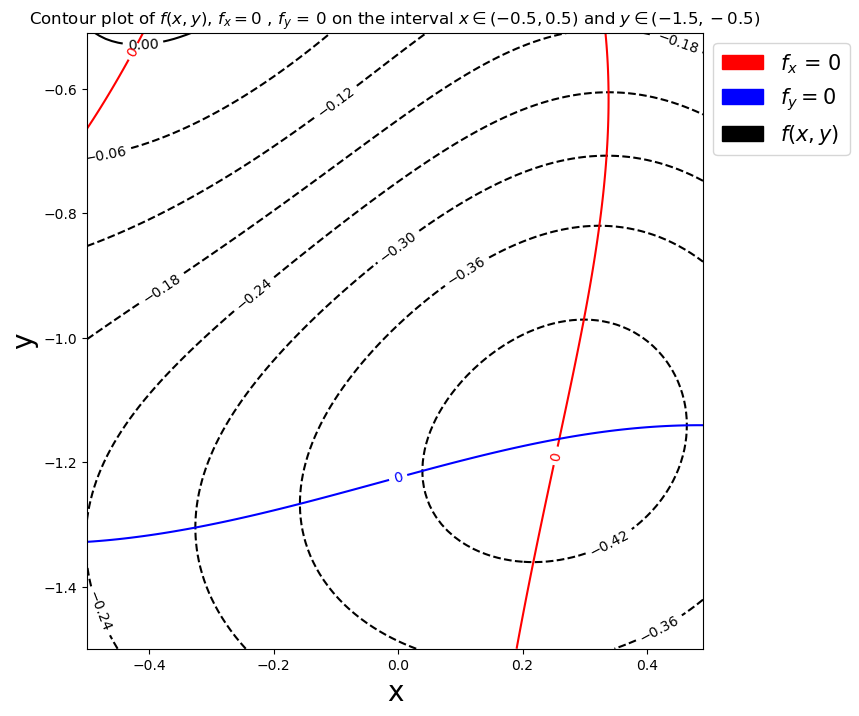

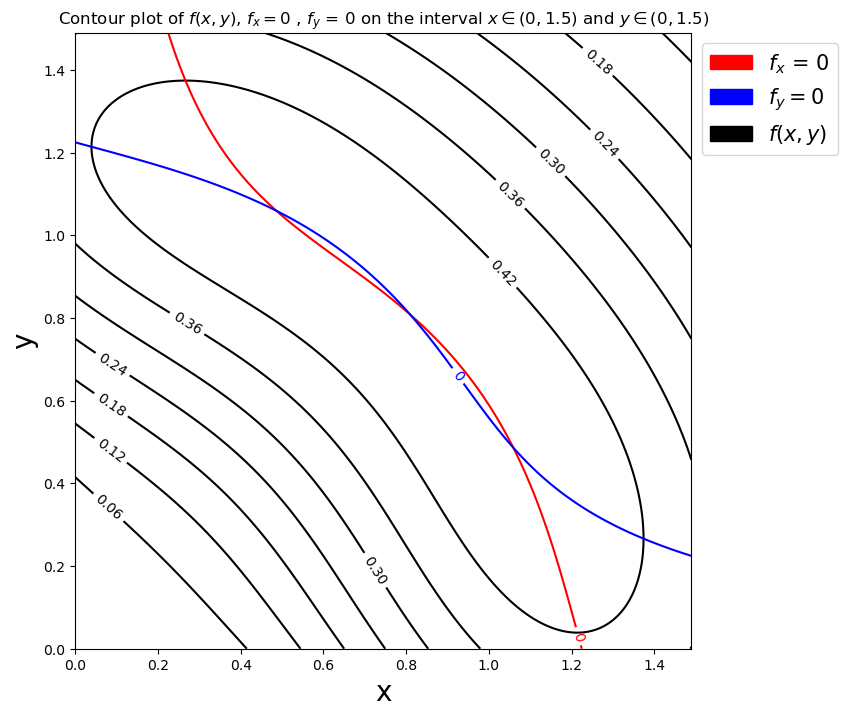

In [10]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(3):
    x_lb = [-2,-0.5,0]
    x_ub = [-1,0.5,1.5]
    y_lb = [-0.5,-1.5,0]
    y_ub = [0.5,-0.5,1.5]

    xp = np.arange(x_lb[i], x_ub[i], 0.01)
    yp = np.arange(y_lb[i], y_ub[i], 0.01)
    X, Y = np.meshgrid(xp, yp)
    lam_f = sym.lambdify([x,y], f , "numpy")(X,Y)
    lam_fx = sym.lambdify([x,y], fx , "numpy")(X,Y)
    lam_fy = sym.lambdify([x,y], fy , "numpy")(X,Y)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect(1)

    graph_f = ax.contour(X, Y, lam_f, levels = 8, colors = "k")
    graph_fx = ax.contour(X, Y, lam_fx, levels = [0], colors = "r")
    graph_fy = ax.contour(X, Y, lam_fy, levels = [0], colors = "b")

    ax.clabel(graph_f)
    ax.clabel(graph_fx)
    ax.clabel(graph_fy)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='r',label='$f_x$ = 0')
    blue_patch = mpatches.Patch(color='b',label='$f_y = 0$')
    black_patch = mpatches.Patch(color='k',label='$f(x,y)$')
    green_patch = mpatches.Patch(color='g',label='Stationary point')
    ax.legend(handles = [red_patch,blue_patch,black_patch], loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 15})
    ax.set_title(f"Contour plot of $f(x,y)$, $f_x = 0$ , $f_y$ = 0 on the interval $x \in ({x_lb[i]},{x_ub[i]})$ and $y \in ({y_lb[i]},{y_ub[i]})$")

We will now try to find these points without using the symbolic solver. We will use the function nsolve where we have to make a guess of the stationary points by looking at the contour plots above.

In [11]:
eqs = [fx.factor(),fy.factor()]

SOLS2 = []

for i in range(4):
    x_guess = [-1.3,0.2,0.5,1.1]
    y_guess = [0.2,-1.2,1.1,0,4]

    SOLS2.append(tuple(sym.nsolve(eqs , [x, y], [x_guess[i],y_guess[i]])))
    
SOLS2

SOLS2_TYPES = []
for i in range(0,len(SOLS2)):
    temp_list = []
    if Delta.subs([(x,SOLS2[i][0]), (y,SOLS2[i][1])]) < 0:
        temp_list.append(SOLS2[i][0])
        temp_list.append(SOLS2[i][1])
        temp_list.append("saddle")
    elif Delta.subs([(x,SOLS2[i][0]), (y,SOLS2[i][1])]) > 0:
        if fxx.subs([(x,SOLS2[i][0]), (y,SOLS2[i][1])]) < 0:
            temp_list.append(SOLS2[i][0])
            temp_list.append(SOLS2[i][1])
            temp_list.append("maximum")
        elif fxx.subs([(x,SOLS2[i][0]), (y,SOLS2[i][1])]) > 0:
            temp_list.append(SOLS2[i][0])
            temp_list.append(SOLS2[i][1])
            temp_list.append("minimum")
    elif Delta.subs([(x,SOLS2[i][0]), (y,SOLS2[i][1])]) == 0:
        print("test is inconclusive")    
    
    SOLS2_TYPES.append(temp_list)

SOLS2_TYPES
    

[[-1.16263503407283, 0.259059629736402, 'minimum'],
 [0.259059629736402, -1.16263503407283, 'minimum'],
 [0.486424797974005, 1.05911586714020, 'maximum'],
 [1.05911586714020, 0.486424797974005, 'maximum']]

We generate one figure that clearly illustrates our findings from the above.

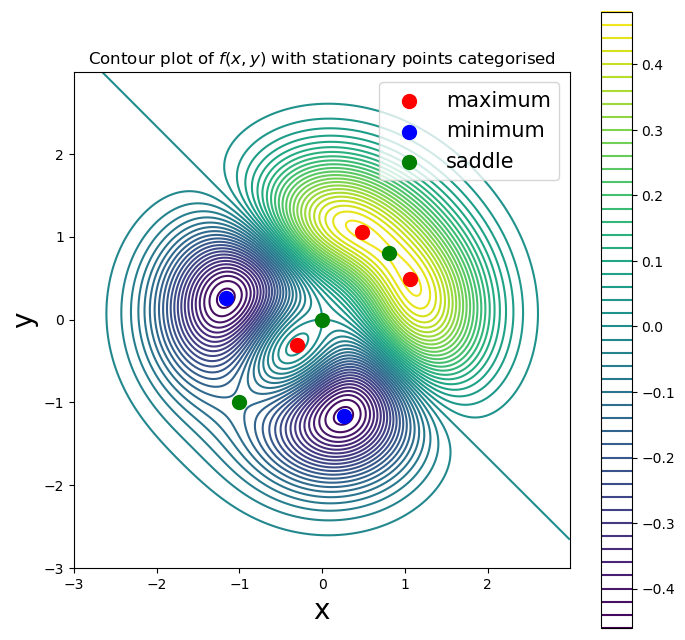

In [12]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lambdifiedfunction = sym.lambdify([x,y], f , "numpy")
max_x = [1/4 - 5**0.5/4,0.486424797974005,1.05911586714020]
max_y = [1/4 - 5**0.5/4,1.05911586714020,0.486424797974005]
min_x = [-1.1626350340728,0.259059629736402]
min_y = [0.259059629736402,-1.16263503407283]
sad_x = [-1,0,1/4 + 5**0.5/4]
sad_y = [-1,0,1/4 + 5**0.5/4]


xp = np.arange(-3, 3, 0.01)
yp = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(xp, yp)
Z = lambdifiedfunction(X,Y)

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)

C = ax.contour(X, Y, Z, levels = 50)
fig.colorbar(C)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.scatter(max_x, max_y, marker="o", color="r", s=100, zorder=2, label="maximum")
ax.scatter(min_x, min_y, marker="o", color="b", s=100, zorder=2, label="minimum")
ax.scatter(sad_x, sad_y, marker="o", color="g", s=100, zorder=2, label="saddle")
ax.set_title(f"Contour plot of $f(x,y)$ with stationary points categorised")

ax.legend(loc='upper right', bbox_to_anchor=(1, 1),prop={'size': 15})

### Part 3: Constraint

Still considering the function $f(x,y)$ given above, the aim here is to identify all maxima and minima of $f$ subject to a given constraint
$$x^2+y^2=1.$$ 

Our goal is to find the stationary points of $f$ given the constraint $x^2+y^2=1$. To do so, we will use the method of Lagrange Multipliers.

1. The function is $f(x,y) = (x^3+y^3+xy) \cdot e^{-x^2-y^2}$
2. The constraint is $g(x,y) = x^2+y^2 - 1 = 0$
3. Define $F(x,y,\lambda) =  (x^3+y^3+xy) \cdot e^{-x^2-y^2} - \lambda (x^2+y^2 - 1)$
4. Using python, we will find the derivatives $F_x, F_y, F_\lambda$ and equate them to zero. Then we will substitute for $x$ and $y$ in terms of $\lambda$
5. Once we get the list of points, we will check whether the point is a maximum or a minimum by comparing it to the next one.

In [13]:
g = x**2 + y**2 - 1
t = sym.symbols('t' , real = True)
F = f - t * g

Fx = sym.diff(F,x)
Fy = sym.diff(F,y)
Ft = sym.diff(F,t)

system = [Fx,Fy,Ft]

list_of_floats = []

K = list(sym.nonlinsolve(system , [x, y, t]))

for i in range(len(K)):
    point = K[i]
    list_of_floats.append(((point[0].evalf(6),point[1].evalf(6))))

list_of_floats = list(dict.fromkeys(list_of_floats))
list_of_floats.sort()
list_of_floats

evaluated = []
#print(list_of_floats)
    
for i in range(len(list_of_floats)):
    point = list_of_floats[i]
    evaluated.append((f.subs(x,point[0])).subs(y,point[1]).evalf())
    
#print(evaluated)

SOLS3_TYPES = []

for i in range(len(evaluated)-1):
    
    temp_list = []
    point = list_of_floats[i]
    if evaluated[i] < evaluated [i+1]:
        temp_list.append(point[0])
        temp_list.append(point[1])
        temp_list.append("minimum")
    elif evaluated[i] > evaluated [i+1]:
        temp_list.append(point[0])
        temp_list.append(point[1])
        temp_list.append("maximum") 
        
    if i == len(evaluated)-2:
        SOLS3_TYPES.append(temp_list)
        temp_list = []
        point = list_of_floats[i+1]
        if evaluated[i] > evaluated [i+1]:
            temp_list.append(point[0])
            temp_list.append(point[1])
            temp_list.append("minimum")
        elif evaluated[i] < evaluated [i+1]:
            temp_list.append(point[0])
            temp_list.append(point[1])
            temp_list.append("maximum") 
        
   
    SOLS3_TYPES.append(temp_list)

SOLS3_TYPES

[[-0.968760, 0.248001, 'minimum'],
 [-0.707107, -0.707107, 'maximum'],
 [0.248001, -0.968760, 'minimum'],
 [0.556737, 0.830689, 'maximum'],
 [0.707107, 0.707107, 'minimum'],
 [0.830689, 0.556737, 'maximum']]

Text(0.5, 1.0, 'Contour plot of $f(x,y)$ with restriction and points categorised')

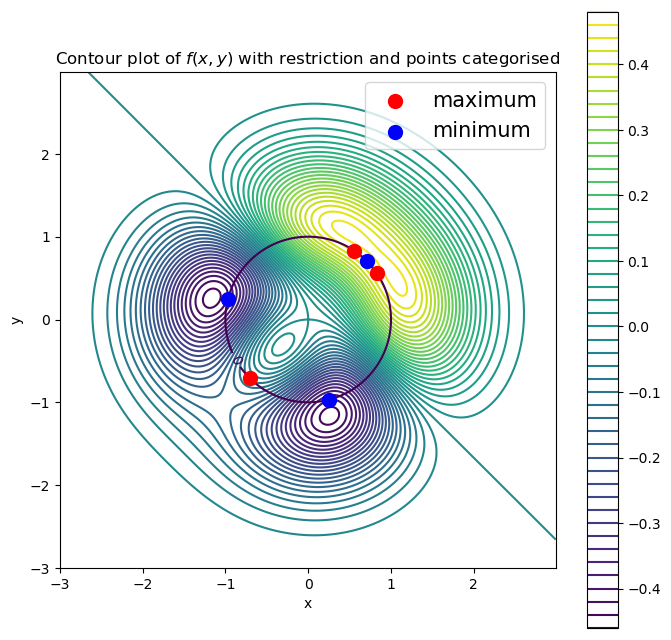

In [14]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

max_x = [-0.707107,0.556737,0.830689]
max_y = [-0.707107,0.830689,0.556737]
min_x = [-0.968760,0.248001,0.707107]
min_y = [0.248001,-0.968760,0.707107]

xp = np.arange(-3, 3, 0.01)
yp = np.arange(-3, 3, 0.01)

X, Y = np.meshgrid(xp, yp)
lam_f = sym.lambdify([x,y], f , "numpy")(X,Y)
lam_g = sym.lambdify([x,y], g , "numpy")(X,Y)


fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)


graph_f = ax.contour(X, Y, lam_f, levels = 50)
graph_g = ax.contour(X, Y, lam_g, levels = [0])
fig.colorbar(graph_f)
ax.set_xlabel("x")
ax.clabel(graph_g)
ax.set_ylabel("y")

ax.scatter(max_x, max_y, marker="o", color="r", s=100, zorder=2, label="maximum")
ax.scatter(min_x, min_y, marker="o", color="b", s=100, zorder=2, label="minimum")
ax.legend(prop={'size': 15})
ax.set_title(f"Contour plot of $f(x,y)$ with restriction and points categorised")


### Extra: Investigation of multivariate Taylor approximations

The aim here is to use plots to show how a 2D Taylor series taken about a point at $(x_0,y_0)$ **locally** approximates the function near to that point. 

The second degree Taylor approximation to $f(x,y)$ about $(x_0,y_0)$ is given by

$$f(x,y) = f(x_0,y_0) + f_x(x_0,y_0)(x-x_0) + f_y(x_0,y_0)(y-y_0) + \frac{1}{2} \left( f_{xx}(x_0,y_0)(x-x_0)^2 + 2 f_{xy}(x_0,y_0)(x-x_0)(y-y_0) + f_{yy}(y-y_0)^2 \right).$$

We take the two stationary points found in Part 2 that are closest to the origin. For each stationary point we make a contour plot of $f(x,y)$ on the square region of width $0.2$ centered at the stationary point.

Then we find the second degree Taylor approximation of $f(x,y)$ at each of the two points. We call these quadratics `Q1` and `Q2`, with `Q1` being the one corresponding to the point closest to the origin.

Finally, we show contour plots of $f(x,y)$ and `Q1` on the same image, on a range $x \in [x_0-\delta, x_0+\delta]$, $y \in [y_0-\delta, y_0+\delta]$ for $\delta = 0.5, 0.25$, and $0.05$ (so making three plots in total). Similarly for the second stationary point.

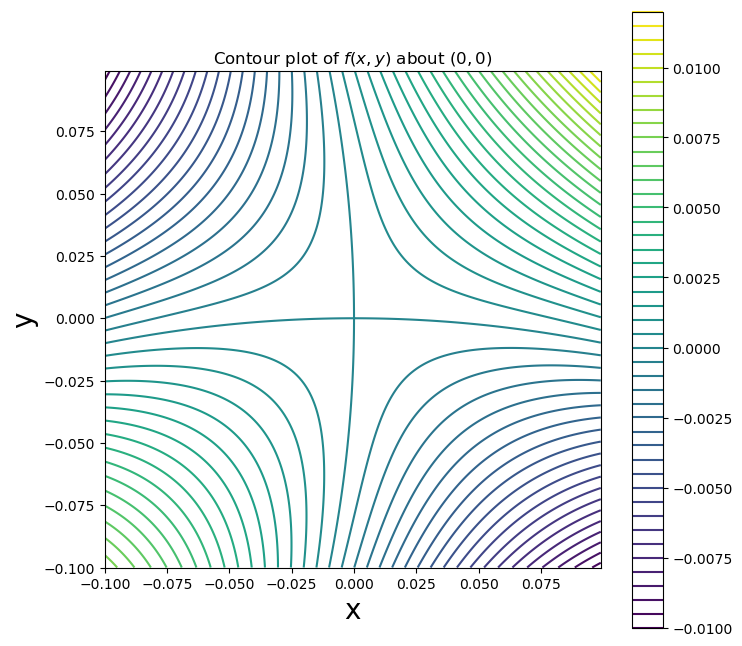

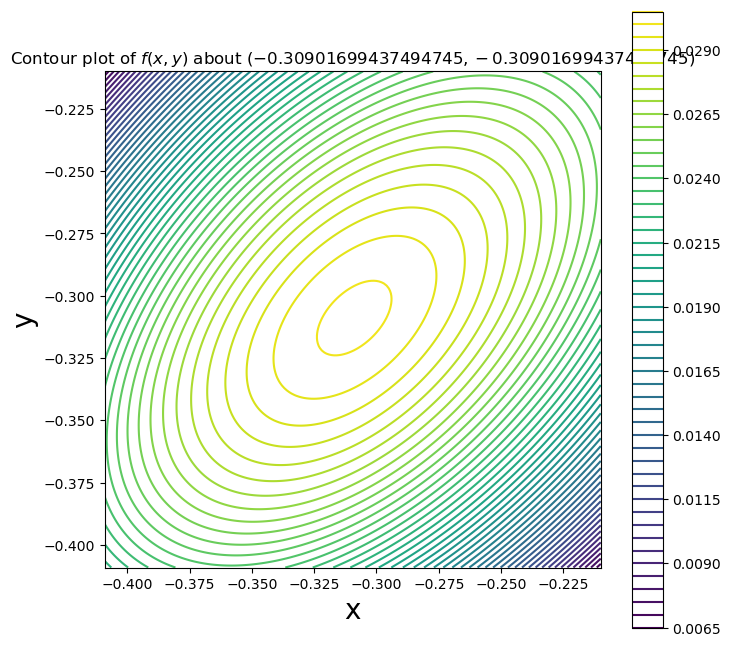

In [15]:
#points closest to the origin are (0,0) and (1/4 - sqrt(5)/4, 1/4 - sqrt(5)/4)

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


for i in range(2):
    centre_x = [0,1/4 - 5 **(0.5) / 4]
    centre_y = [0,1/4 - 5 **(0.5) / 4]

    U = sym.lambdify([x,y], f , "numpy")

    xp = np.arange(centre_x[i]-0.1, centre_x[i]+0.1, 0.001)
    yp = np.arange(centre_y[i]-0.1, centre_y[i]+0.1, 0.001)

    X, Y = np.meshgrid(xp, yp)
    Z = U(X,Y)

    fig, ax = plt.subplots(figsize=(8,8))

    ax.set_aspect(1)

    C = ax.contour(X, Y, Z, levels = 50)
    fig.colorbar(C)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title(f"Contour plot of $f(x,y)$ about ${centre_x[i],centre_y[i]}$");

In [16]:
#this is for Q1
x_0 = 0
y_0 = 0
Q1 = f.subs({x:x_0, y:y_0,}) + fx.subs({x:x_0, y:y_0,}) * (x-x_0) + fy.subs({x:x_0, y:y_0,}) * (y-y_0) + 0.5 * (fxx.subs({x:x_0, y:y_0,}) * (x-x_0)**2 + 2 * fxy.subs({x:x_0, y:y_0,}) * (x-x_0) * (y-y_0) + fyy.subs({x:x_0, y:y_0,}) * (y-y_0)**2)

#this is for Q2
x_0 = 1/4 - 5 **(0.5) / 4
y_0 = 1/4 - 5 **(0.5) / 4
Q2 = f.subs({x:x_0, y:y_0,}) + fx.subs({x:x_0, y:y_0,}) * (x-x_0) + fy.subs({x:x_0, y:y_0,}) * (y-y_0) + 0.5 * (fxx.subs({x:x_0, y:y_0,}) * (x-x_0)**2 + 2 * fxy.subs({x:x_0, y:y_0,}) * (x-x_0) * (y-y_0) + fyy.subs({x:x_0, y:y_0,}) * (y-y_0)**2)

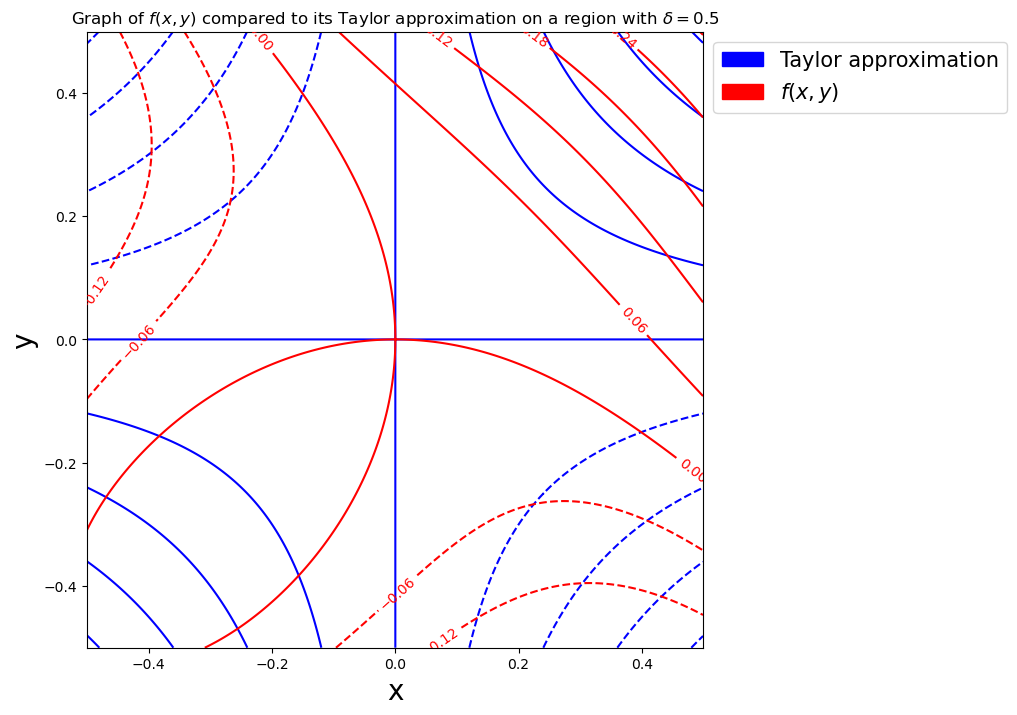

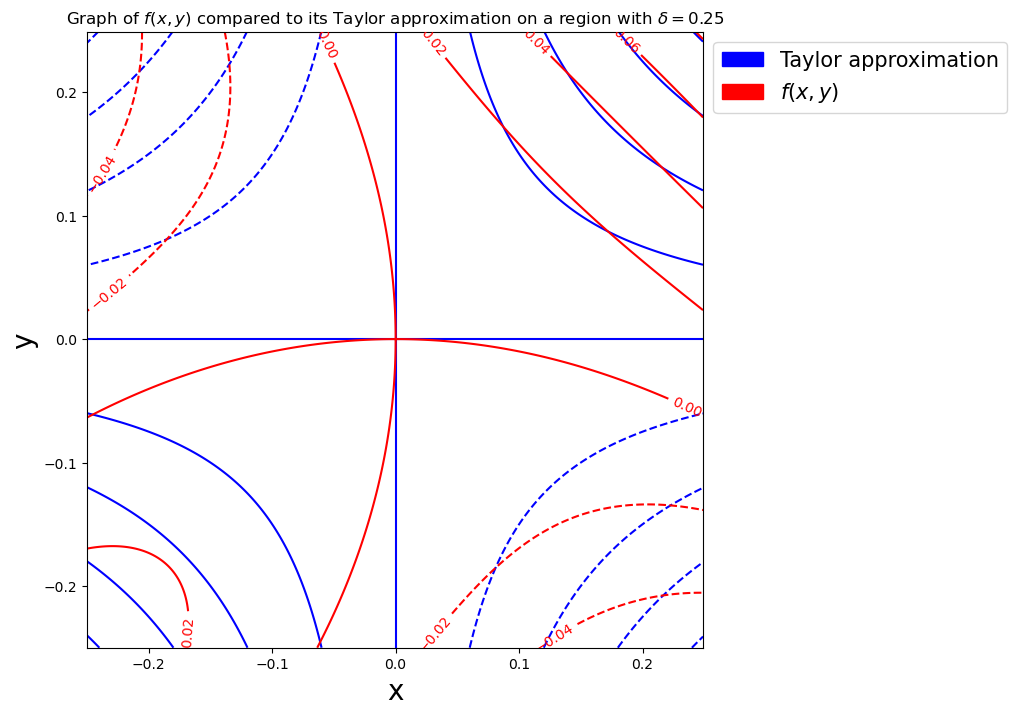

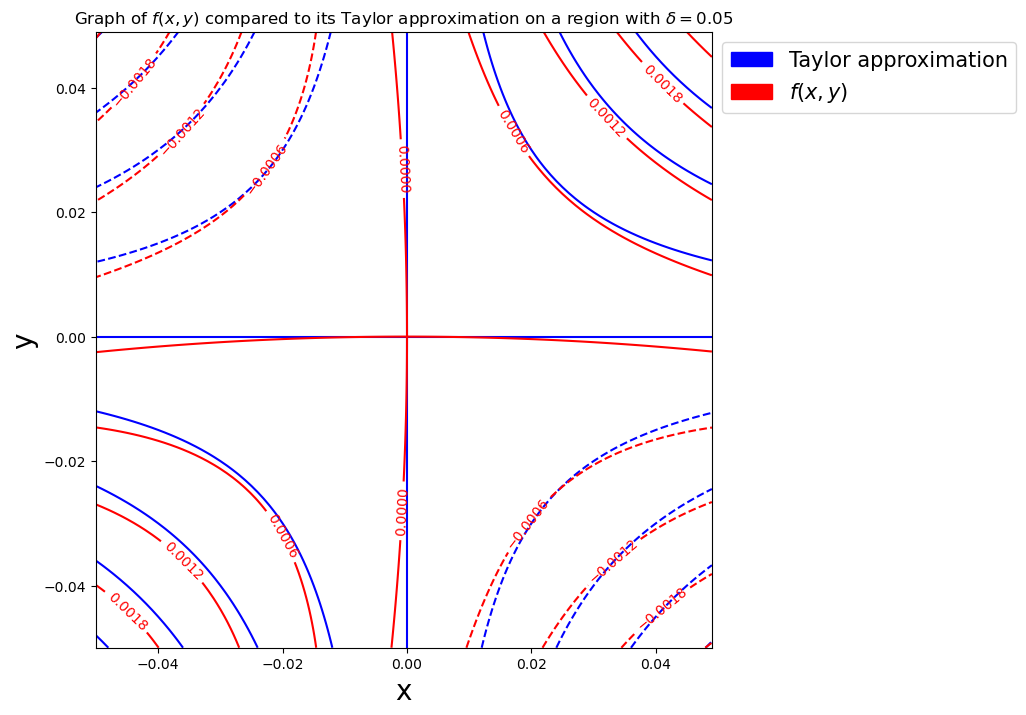

In [17]:
for i in [0.5,0.25,0.05]:
    centre_x = 0
    centre_y = 0

    xp = np.arange(centre_x-i, centre_x+i, 0.001)
    yp = np.arange(centre_y-i, centre_y+i, 0.001)

    X, Y = np.meshgrid(xp, yp)

    lam_Q1 = sym.lambdify([x,y], Q1 , "numpy")(X,Y)
    lam_f = sym.lambdify([x,y], f , "numpy")(X,Y)

    fig, ax = plt.subplots(figsize=(8,8))

    ax.set_aspect(1)

    graph_Q1 = ax.contour(X, Y, lam_Q1, levels = 8, colors = "b")
    graph_f = ax.contour(X, Y, lam_f, levels = 8, colors = "r")
    ax.clabel(graph_f)
    ax.set_xlabel("x",fontsize=20)
    ax.set_ylabel("y",fontsize=20)
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='b',label='Taylor approximation')
    blue_patch = mpatches.Patch(color='r',label='$f(x,y)$')
    ax.legend(handles = [red_patch,blue_patch], loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 15})
    ax.set_title(f"Graph of $f(x,y)$ compared to its Taylor approximation on a region with $\delta = {i}$");

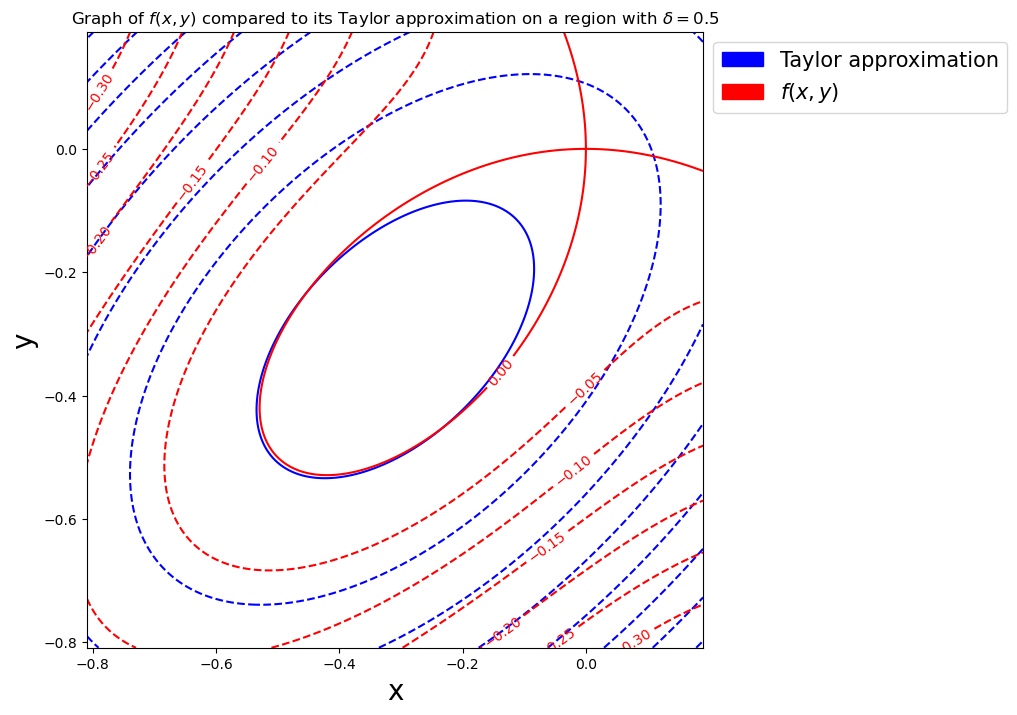

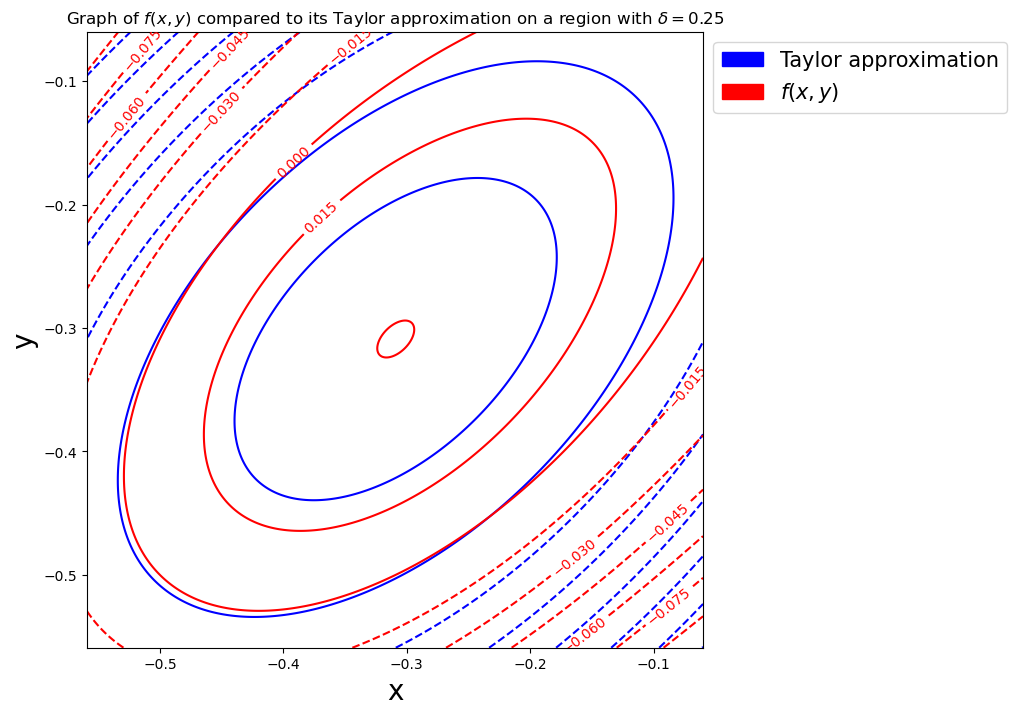

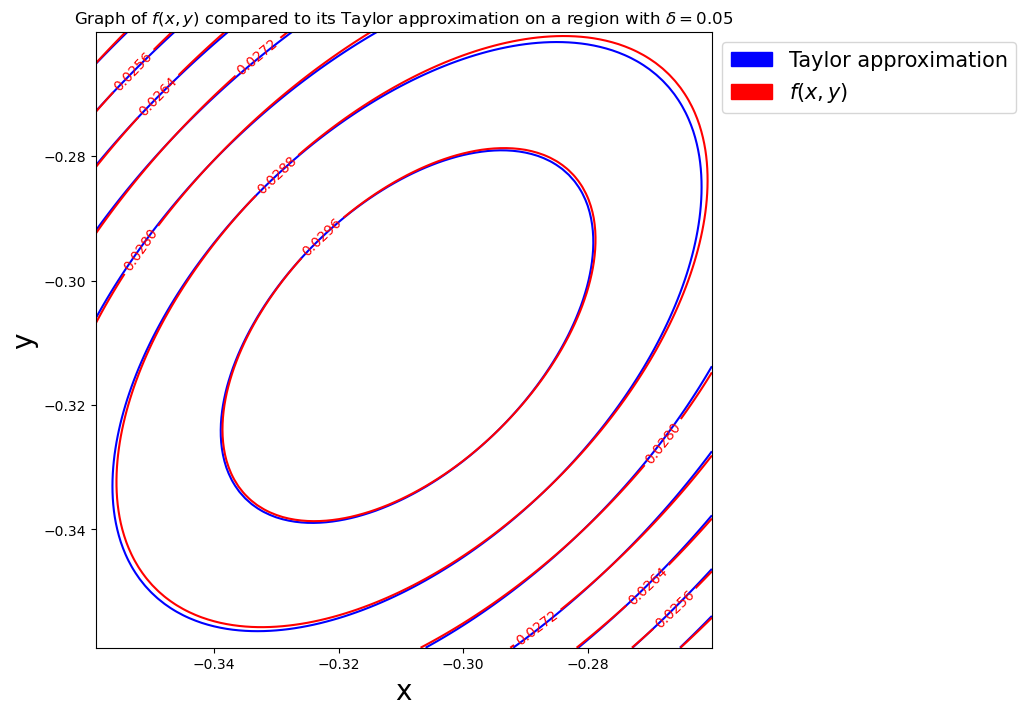

In [18]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for i in [0.5,0.25,0.05]:
    centre_x = 1/4 - 5 **(0.5) / 4
    centre_y = 1/4 - 5 **(0.5) / 4

    xp = np.arange(centre_x-i, centre_x+i, 0.001)
    yp = np.arange(centre_y-i, centre_y+i, 0.001)

    X, Y = np.meshgrid(xp, yp)

    lam_Q2 = sym.lambdify([x,y], Q2 , "numpy")(X,Y)
    lam_f = sym.lambdify([x,y], f , "numpy")(X,Y)

    fig, ax = plt.subplots(figsize=(8,8))

    ax.set_aspect(1)

    graph_Q2 = ax.contour(X, Y, lam_Q2, levels = 8, colors = "b")
    graph_f = ax.contour(X, Y, lam_f, levels = 8, colors = "r")
    ax.clabel(graph_f)
    ax.set_xlabel("x",fontsize=20)
    ax.set_ylabel("y",fontsize=20)
    ax.set_title(f"Graph of $f(x,y)$ compared to its Taylor approximation on a region with $\delta = {i}$");
    import matplotlib.patches as mpatches
    red_patch = mpatches.Patch(color='b',label='Taylor approximation')
    blue_patch = mpatches.Patch(color='r',label='$f(x,y)$')
    ax.legend(handles = [red_patch,blue_patch], loc='upper left', bbox_to_anchor=(1, 1),prop={'size': 15})

The taylor approximation is a good approximation only for small values of delta